## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('../Datasets/drugsComTrain_raw.tsv',sep='\t')
data = data.drop(data.columns[0], axis=1)
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (161297, 6)


In [3]:
data.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
# Explore Some of the Important Columns in the dataset

print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions present in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : April 1, 2008
Ending Date : September 9, 2017


In [5]:
# see how many reviews are there for every condition
data.groupby('condition').count().sort_values(by='drugName',ascending=False)['drugName']

condition
Birth Control                              28788
Depression                                  9069
Pain                                        6145
Anxiety                                     5904
Acne                                        5588
                                           ...  
Radionuclide Myocardial Perfusion Study        1
Rabies Prophylaxis                             1
Q Feve                                         1
Bartonellosis                                  1
Anti NMDA Receptor Encephalitis                1
Name: drugName, Length: 884, dtype: int64

In [6]:
def clean_condition(con):
    if 'Depress' in con:
        return 'Depression'
    if 'Anxiety' in con:
        return 'Anxiety'
    if 'ADHD' in con:
        return 'ADHD'
    if 'Pain' in con:
        return 'Pain'
    if 'Insomnia' in con:
        return 'Insomnia'
    if 'Smok' in con:
        return 'Smoking Cessation'
    if 'Panic' in con:
        return 'Panic Disorder'
    if 'Sedation' in con:
        return 'Sedation'
    else: return con

In [7]:
cleaned_condition = []
for i in range(len(data['condition'])):
    cleaned_condition.append(clean_condition(str(data['condition'][i])))

In [8]:
data['clean_condition'] = cleaned_condition

In [9]:
condition_name = data.groupby('clean_condition').count().sort_values(by='drugName',ascending=False).head(29)['drugName']
condition_name

clean_condition
Birth Control                28788
Depression                   10773
Anxiety                       9314
Pain                          8820
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3700
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Constipation                  1595
Panic Disorder                1463
Migraine Prevention           1413
Urinary Tract Infection       1316
Muscle Spasm                  1244
Osteoarthritis                1239
Erectile Dysfunction          1086
Opiate Dependence             1079
Irritable Bowel Syndrome      1014
Rheu

In [10]:
condition_list=list(condition_name.index)

In [11]:
data_new = data.loc[data['clean_condition'].isin(condition_list)]

In [12]:
data_new

,drugName,condition,review,rating,date,usefulCount,clean_condition
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,ADHD
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,Birth Control
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,Birth Control
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,Opiate Dependence
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,"March 7, 2017",5,Emergency Contraception
...,...,...,...,...,...,...,...
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33,Depression
161287,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9.0,"August 16, 2016",61,Anxiety
161290,Tekturna,High Blood Pressure,"""I have only been on Tekturna for 9 days. The ...",7.0,"February 7, 2010",18,High Blood Pressure
161291,Junel 1.5 / 30,Birth Control,"""This would be my second month on Junel. I&#03...",6.0,"May 27, 2015",0,Birth Control


In [13]:
# check for Missing Values
data_new.isnull().sum()

drugName           0
condition          0
review             0
rating             0
date               0
usefulCount        0
clean_condition    0
dtype: int64

In [14]:
data_new = data_new.dropna()
data_new.isnull().sum().sum()

0

In [15]:
data_new.shape

(113043, 7)

In [16]:
print("The Shape of the Dataset :", data_new.shape)

The Shape of the Dataset : (113043, 7)


## EDA

### Distribution

/home/teja/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/teja/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


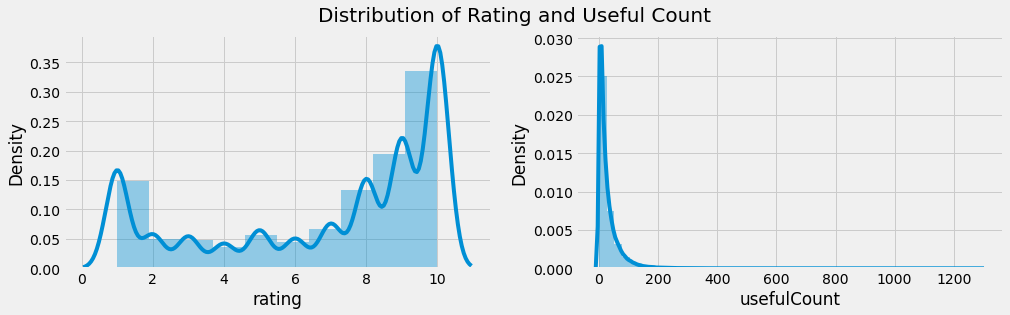

In [17]:
# check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(data_new['rating'], bins=10)

plt.subplot(1, 2, 2)
sns.distplot(data_new['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

In [18]:
# check the Highest Length Review
data_new['len']  = data_new['review'].apply(len)
print("Length of Longest Review", data_new['len'].max())
data_new['review'][data_new['len'] == data_new['len'].max()].iloc[0]

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

### Total number of Reviews posted each day

In [19]:
data_new=data_new.sort_values(by='date')

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chisquare
import pickle
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
from statsmodels.stats.multitest import fdrcorrection_twostage
%matplotlib inline

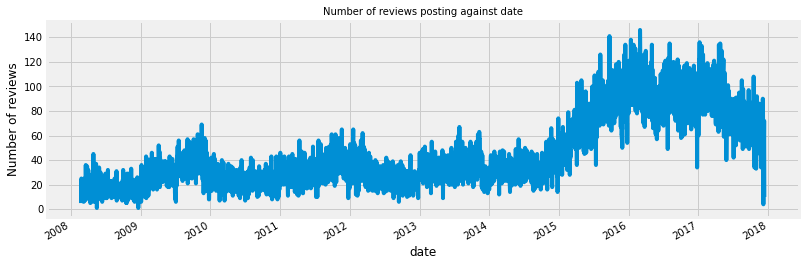

In [21]:
data['date'] = pd.to_datetime(data['date'])
data.groupby('date').size().plot(figsize=(12,4))
plt.ylabel('Number of reviews')
plt.title("Number of reviews posting against date",fontsize=10)
plt.savefig("num_reviews_date.png")

### Total number of Reviews posted each month

<AxesSubplot:xlabel='month', ylabel='rating'>

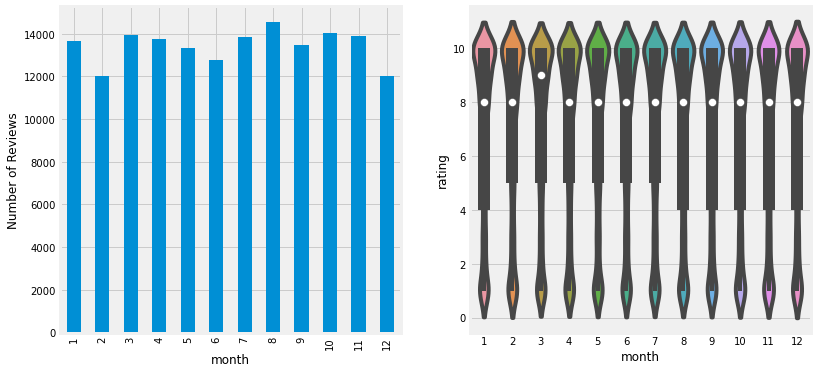

In [22]:
data['month'] = data['date'].apply(lambda x: x.month)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
data.groupby('month').size().plot(kind='bar')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
sns.violinplot(data=data,x='month',y='rating')

### Total number of Reviews for each condition

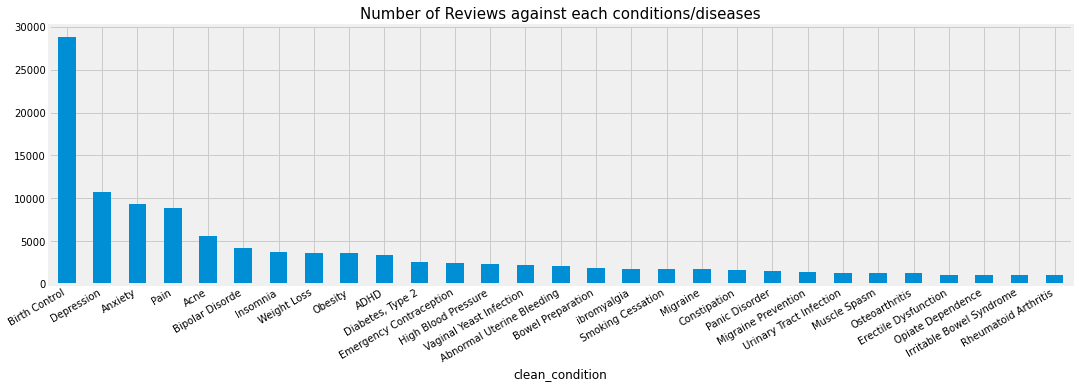

In [23]:
data_new['date'] = pd.to_datetime(data_new['date'])
data_new['month'] = data_new['date'].apply(lambda x: x.month)
df_con_mon = pd.DataFrame(data_new.groupby(['clean_condition','month']).size()).reset_index()

df_con_mon_pivot = df_con_mon.pivot_table(index='clean_condition',columns='month',values=0)

fig = plt.figure(figsize=(15,5))
df_con_mon_pivot.sum(1).sort_values(ascending=False).iloc[:50].plot(kind='bar')
plt.title("Number of Reviews against each conditions/diseases",fontsize=15)
plt.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xticks(fontsize=10)

plt.savefig("num_reviews_each_condition.png")

In [24]:
df_con_mon_pivot.sum(1).sort_values(ascending=False)

clean_condition
Birth Control                28788
Depression                   10773
Anxiety                       9314
Pain                          8820
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3700
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Constipation                  1595
Panic Disorder                1463
Migraine Prevention           1413
Urinary Tract Infection       1316
Muscle Spasm                  1244
Osteoarthritis                1239
Erectile Dysfunction          1086
Opiate Dependence             1079
Irritable Bowel Syndrome      1014
Rheu

### Total number of Reviews for each condition against each month

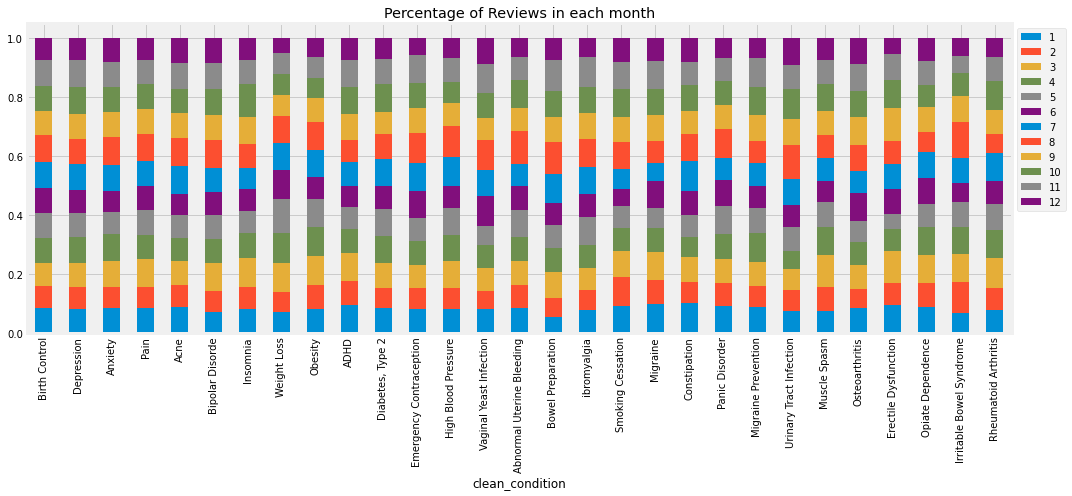

In [25]:
n = 50
top_n_index = df_con_mon_pivot.sum(1).sort_values(ascending=False).iloc[:n].index
tm_con_mon_pivot = df_con_mon_pivot.loc[top_n_index]
tm_con_mon_pivot_per = tm_con_mon_pivot.div(tm_con_mon_pivot.sum(1), axis=0)
tm_con_mon_pivot_per.plot.bar(stacked=True, figsize=(15,7))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Percentage of Reviews in each month")
plt.tight_layout()
plt.savefig("Per_Reviews_month.png")

### Number of reviews for the drugs for each condition

In [26]:
data_new[['clean_condition', 'drugName', 'usefulCount']].groupby(
    ['drugName', 'clean_condition'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName                            clean_condition        
Etonogestrel                        Birth Control              3314
Ethinyl estradiol / norethindrone   Birth Control              2337
Nexplanon                           Birth Control              2149
Levonorgestrel                      Birth Control              2129
Ethinyl estradiol / levonorgestrel  Birth Control              1600
Ethinyl estradiol / norgestimate    Birth Control              1580
Levonorgestrel                      Emergency Contraception    1221
Phentermine                         Weight Loss                1211
Implanon                            Birth Control              1095
Miconazole                          Vaginal Yeast Infection     997
Mirena                              Birth Control               965
Skyla                               Birth Control               822
Varenicline                         Smoking Cessation           785
Escitalopram                        Anxiety             

In [27]:
# for depression
print('Depression')
print(data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20))

Depression
drugName
Bupropion         666
Venlafaxine       537
Sertraline        527
Vortioxetine      506
Pristiq           444
Desvenlafaxine    440
Escitalopram      427
Citalopram        406
Trintellix        394
Vilazodone        393
Duloxetine        362
Viibryd           361
Zoloft            340
Fluoxetine        338
Cymbalta          334
Lexapro           333
Wellbutrin        261
Mirtazapine       245
Celexa            233
Prozac            226
Name: usefulCount, dtype: int64


In [28]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
Escitalopram    771
Lexapro         577
Citalopram      492
Alprazolam      428
Sertraline      423
Buspirone       407
Clonazepam      392
Paroxetine      328
Hydroxyzine     315
Lorazepam       299
Venlafaxine     295
Xanax           283
Propranolol     281
Paxil           255
Celexa          242
BuSpar          233
Fluoxetine      231
Klonopin        229
Diazepam        204
Gabapentin      193
Name: usefulCount, dtype: int64

In [29]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
Zolpidem           477
Trazodone          382
Ambien             286
Suvorexant         201
Quetiapine         191
Belsomra           189
Temazepam          183
Eszopiclone        162
Doxepin            130
Lunesta            128
Mirtazapine        121
Amitriptyline      109
Melatonin          101
Doxylamine          72
Clonazepam          70
Silenor             66
Diphenhydramine     64
Zaleplon            55
Seroquel            47
Lorazepam           46
Name: usefulCount, dtype: int64

In [30]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
Sertraline     206
Clonazepam     189
Alprazolam     168
Zoloft         164
Xanax          118
Klonopin       113
Paroxetine      64
Buspirone       48
Paxil           46
Citalopram      43
Fluoxetine      43
Lorazepam       41
Prozac          28
BuSpar          25
Venlafaxine     23
Ativan          22
Propranolol     17
Effexor XR      16
Xanax XR        13
Imipramine      11
Name: usefulCount, dtype: int64

Adding up the useful counts, we get a sense of how many people are viewing the reviews for the drug for each condition.

In [31]:
data_new[['clean_condition', 'drugName','usefulCount']].groupby(
    ['drugName', 'clean_condition'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName      clean_condition
Phentermine   Weight Loss        39137
Bupropion     Depression         35294
Escitalopram  Anxiety            30991
Lexapro       Anxiety            29320
Citalopram    Anxiety            28841
Sertraline    Depression         24982
Zoloft        Depression         24824
Etonogestrel  Birth Control      21885
Lorcaserin    Weight Loss        21707
Belviq        Weight Loss        21440
Vortioxetine  Depression         20974
Buspirone     Anxiety            20364
Trintellix    Depression         20211
Trazodone     Insomnia           20092
Celexa        Anxiety            20071
BuSpar        Anxiety            19859
Oxycodone     Pain               19841
Lamotrigine   Bipolar Disorde    18463
Escitalopram  Depression         18381
Viibryd       Depression         18381
Name: usefulCount, dtype: int64

In [32]:
# for depression
data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
Bupropion         35294
Sertraline        24982
Zoloft            24824
Vortioxetine      20974
Trintellix        20211
Viibryd           18381
Escitalopram      18381
Wellbutrin        18107
Vilazodone        17814
Desvenlafaxine    17460
Lexapro           17009
Duloxetine        16785
Pristiq           16636
Venlafaxine       15584
Citalopram        15543
Fluoxetine        14382
Cymbalta          14255
Celexa            13074
Prozac            12892
Aripiprazole      10665
Name: usefulCount, dtype: int64

In [33]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
Escitalopram    30991
Lexapro         29320
Citalopram      28841
Buspirone       20364
Celexa          20071
BuSpar          19859
Fluoxetine      17933
Sertraline      17746
Alprazolam      16493
Gabapentin      15729
Clonazepam      15724
Paroxetine      14279
Klonopin        13946
Prozac          13896
Xanax           13722
Paxil           13498
Diazepam        13103
Hydroxyzine     12152
Venlafaxine     12079
Lorazepam       11321
Name: usefulCount, dtype: int64

In [34]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
Trazodone        20092
Zolpidem         10345
Ambien            8219
Quetiapine        7292
Amitriptyline     6445
Mirtazapine       6265
Temazepam         6091
Doxepin           5430
Suvorexant        4804
Belsomra          4615
Clonazepam        4402
Eszopiclone       3615
Lorazepam         3585
Lunesta           3355
Silenor           3249
Melatonin         3104
Restoril          2300
Doxylamine        2249
Gabapentin        2114
Seroquel          1729
Name: usefulCount, dtype: int64

In [35]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
Sertraline     8516
Zoloft         7797
Clonazepam     7171
Alprazolam     6929
Klonopin       6544
Xanax          6317
Buspirone      2261
Fluoxetine     2003
Prozac         1928
Lorazepam      1886
Citalopram     1693
Paroxetine     1678
BuSpar         1537
Paxil          1437
Ativan         1093
Venlafaxine     627
Effexor XR      597
Imipramine      544
Xanax XR        517
Propranolol     472
Name: usefulCount, dtype: int64

### Average ratings of Drugs

In [36]:
data_new[['clean_condition', 'drugName','rating']].groupby(
    ['drugName', 'clean_condition'])['rating'].mean().sort_values(ascending=False).head(20)

drugName                            clean_condition        
Salicylic acid / sulfur             Acne                       10.0
Fleet Glycerin Suppositories Adult  Constipation               10.0
Phosphasal                          Urinary Tract Infection    10.0
Aspirin / caffeine                  Pain                       10.0
Feverall                            Pain                       10.0
Plan B                              Birth Control              10.0
Fastin                              Obesity                    10.0
Plendil                             High Blood Pressure        10.0
Exubera                             Diabetes, Type 2           10.0
Exparel                             Pain                       10.0
Exforge HCT                         High Blood Pressure        10.0
Prednicot                           Rheumatoid Arthritis       10.0
ProCentra                           ADHD                       10.0
Provera                             Birth Control       

In [37]:
# for depression
data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
Niravam                             10.000000
Norpramin                           10.000000
Prozac Weekly                       10.000000
Ludiomil                            10.000000
Maprotiline                         10.000000
Asendin                             10.000000
Xanax XR                            10.000000
Desipramine                          9.857143
Niacin                               9.857143
Amitriptyline / chlordiazepoxide     9.666667
Serzone                              9.666667
Methylin ER                          9.500000
Limbitrol                            9.500000
Amoxapine                            9.500000
Luvox                                9.333333
Tramadol                             9.288462
Clomipramine                         9.181818
Xanax                                9.166667
Methylphenidate                      9.160000
Alprazolam                           9.081967
Name: rating, dtype: float64

In [38]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
Alprazolam Intensol                 10.000000
Micrainin                           10.000000
Zetran                              10.000000
Pexeva                              10.000000
Phenytoin                           10.000000
Diazepam Intensol                   10.000000
Wellbutrin                          10.000000
Luvox CR                            10.000000
Risperdal                           10.000000
Tranxene SD                         10.000000
Lorazepam Intensol                  10.000000
Elavil                               9.888889
Prazosin                             9.833333
Niravam                              9.800000
Amitriptyline / chlordiazepoxide     9.666667
Klonopin Wafer                       9.600000
Triavil                              9.500000
Limbitrol DS                         9.500000
Amitriptyline / perphenazine         9.500000
Tramadol                             9.454545
Name: rating, dtype: float64

In [39]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
Pentobarbital                 10.000000
Seconal Sodium                10.000000
Seconal                       10.000000
Secobarbital                  10.000000
Ethchlorvynol                 10.000000
Tryptophan                     9.750000
Intermezzo                     9.666667
Dimenhydrinate                 9.666667
Quazepam                       9.600000
Somnote                        9.500000
Triazolam                      9.423077
Estazolam                      9.363636
Halcion                        9.307692
Klonopin                       9.076923
Compoz Nighttime Sleep Aid     9.000000
Aspirin / diphenhydramine      9.000000
Advil PM                       9.000000
Doral                          9.000000
Sinequan                       9.000000
Unisom SleepMelts              9.000000
Name: rating, dtype: float64

In [40]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
Tofranil               10.000000
Niravam                10.000000
Nefazodone             10.000000
Alprazolam Intensol    10.000000
Klonopin Wafer          9.666667
Wellbutrin SR           9.500000
Nortriptyline           9.500000
Xanax                   9.186441
Alprazolam              9.172619
Anafranil               9.166667
Clomipramine            9.125000
Clonazepam              9.095238
Xanax XR                9.076923
Klonopin                9.000000
Serzone                 9.000000
Ludiomil                9.000000
Lorazepam               8.951220
Ativan                  8.772727
Desvenlafaxine          8.750000
Prozac                  8.250000
Name: rating, dtype: float64